# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Hierarchical Clustering - USArrest</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [WhatsApp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |

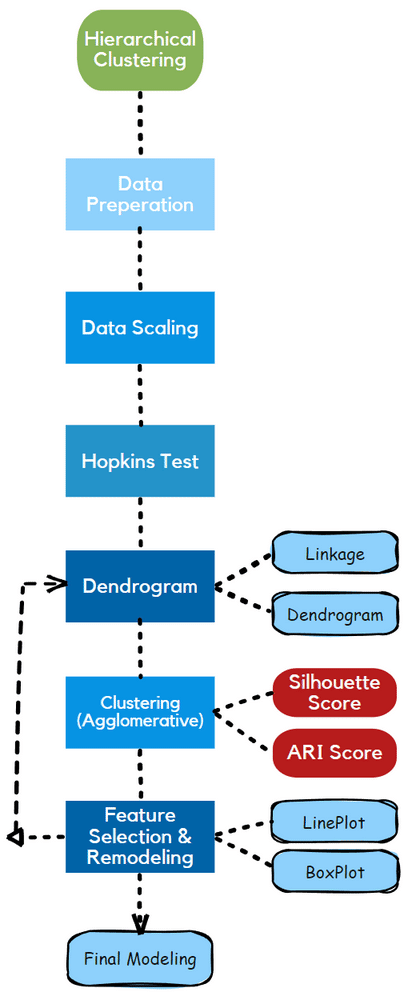

# Hierarchical Clustering - USArrest data sets

https://www.kaggle.com/datasets/ciyakhan/us-arrests

**Veri Seti: ABD Eyaletlerine Ait Suç İstatistikleri**

Bu veri seti, **ABD'nin çeşitli eyaletlerine ait suç oranlarını** içerir ve eyaletlerin güvenlik politikalarını belirlemek için kullanılabilir. Suç oranları, eyaletlerin genel güvenlik durumunu anlamak ve **yüksek-orta-düşük suç oranına sahip eyaletler** olarak sınıflandırmak için analiz edilmektedir.

---

**Veri Setindeki Özellikler (Features):**

| **Feature** | **Açıklama** |
|-------------|--------------|
| **Murder**  | Her 100,000 kişi başına düşen cinayet (öldürme) oranı. |
| **Assault** | Her 100,000 kişi başına düşen saldırı suçlarının sayısı. |
| **UrbanPop** | Eyaletin kentsel nüfus yüzdesi (%). |
| **Rape**    | Her 100,000 kişi başına düşen cinsel saldırı suçlarının sayısı. |

---

**Senaryo: Güvenlik Politikalarının Belirlenmesi**

- **Amaç:**  
  Suç oranlarına göre eyaletleri gruplandırarak (yüksek, orta, düşük suç oranı gibi), her gruba özel güvenlik önlemleri ve politikaları geliştirmek.

- **Örnek Durum:**
  - Suç oranı yüksek olan eyaletlere daha fazla güvenlik personeli atanabilir.
  - Orta seviyede suç oranına sahip eyaletlerde suç önleyici programlar uygulanabilir.
  - Suç oranı düşük eyaletlerde mevcut güvenlik yapısı korunabilir.

- **Sonuç:**  
  Elde edilen kümeler, eyaletlerin güvenlik ve suç politikalarını optimize etmek için bir rehber olacaktır.

---

**Analiz Planı: Kümeleme ile Eyaletlerin Sınıflandırılması**

1. **Veri Hazırlığı:**
   - Özellikler arasında farklı birimler olduğu için veriler **ölçeklendirilmelidir**.
   - Örneğin, "Murder" ve "Rape" oranları doğrudan sayısal bir değer iken, "UrbanPop" bir yüzdelik değerdir. Bu yüzden ölçekleme önemlidir.

2. **Kümeleme Yöntemi:**
   - **K-Means Kümeleme:** 
     - Eyaletleri, suç oranlarına göre gruplamak için hızlı ve etkili bir yöntemdir.
   - **Hiyerarşik Kümeleme:**
     - Dendrogram yardımıyla kümeleme yapısı görselleştirilebilir ve küme sayısı belirlenebilir.

3. **Kümeleme Kriterleri:**
   - Suç oranına göre **yüksek, orta, düşük** olarak 3 küme oluşturulması planlanabilir.

---


**Sonuç**

- **Elde Edilen Kümeler:**
  1. **Yüksek Suç Oranı:** Cinayet, saldırı ve cinsel saldırı suçlarının yüksek olduğu eyaletler.
  2. **Orta Suç Oranı:** Ortalama düzeyde suç oranına sahip eyaletler.
  3. **Düşük Suç Oranı:** Suç oranlarının düşük olduğu ve nispeten daha güvenli olan eyaletler.

- **Eylem Planı:**
  - **Yüksek Suç Oranı:** Güvenlik personeli sayısının artırılması, suç önleyici politikaların uygulanması.
  - **Orta Suç Oranı:** Suç oranının yükselmesini engellemek için tedbirler alınması.
  - **Düşük Suç Oranı:** Mevcut güvenlik politikalarının korunması.

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# plt.rcParams["figure.figsize"] = (10,6)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [6]:
df = pd.read_csv("USArrest.csv", index_col=0)   # datasetinin ilk index i eyalet isimleri oluşacak şekilde düzenledik

In [7]:
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,0.8,45,58,7.3
Alaska,2.1,46,48,7.8
Arizona,2.1,48,80,8.3
Arkansas,2.2,53,50,9.3
California,2.2,56,91,9.5


## Exploratory Data Analysis and Visualization

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


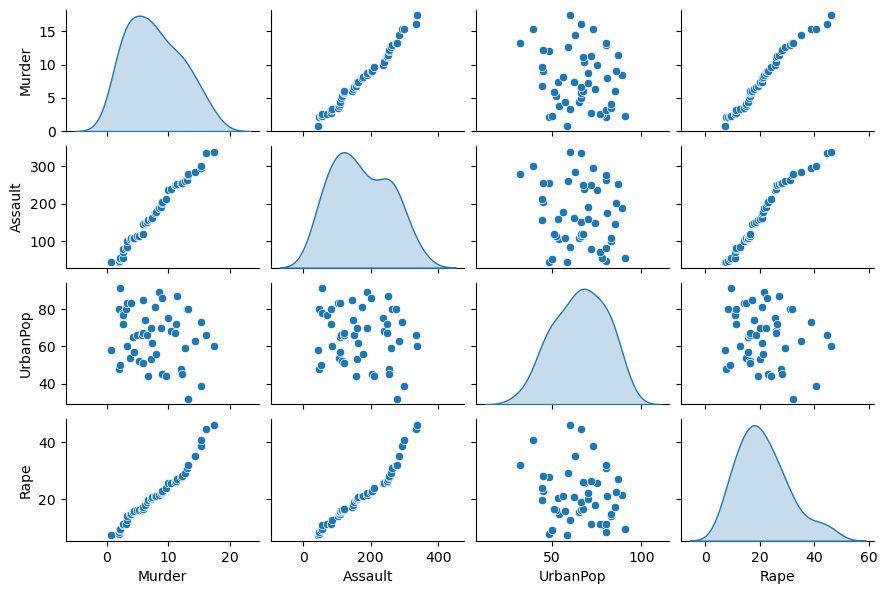

In [11]:
sns.pairplot(df, height=1.5, aspect=1.5, diag_kind="kde");

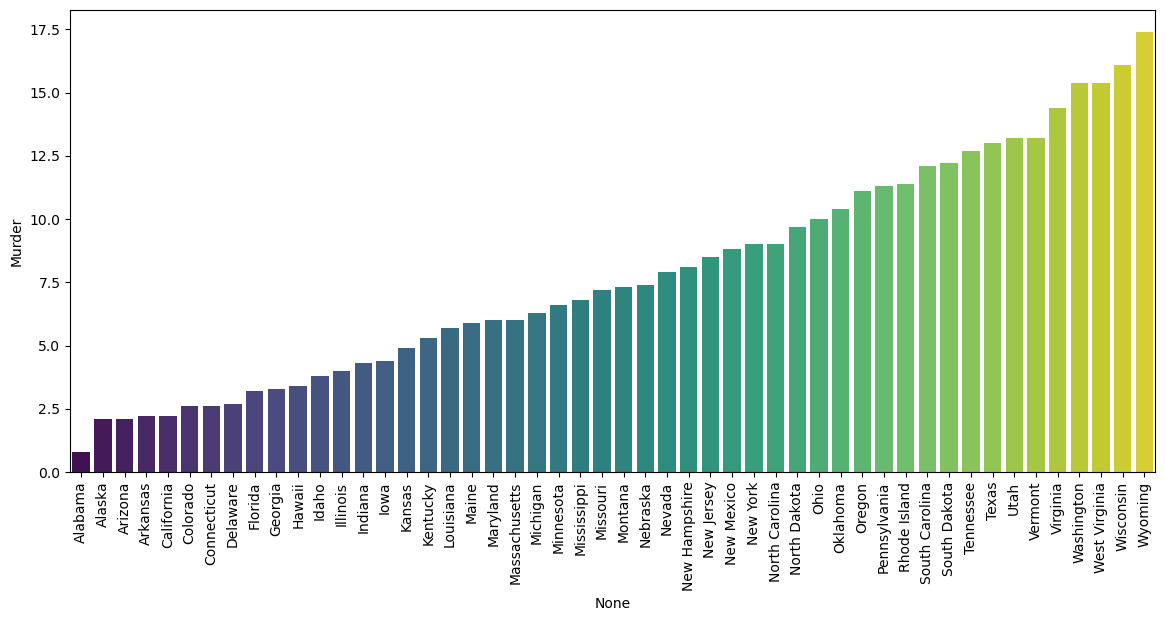

In [12]:
# Murder (cinayet) sayılarına göre

plt.figure(figsize = (14,6))
sns.barplot(
    y=df.Murder.sort_values(),
    x=df.Murder.sort_values().index,
    palette="viridis" 
)
plt.xticks(rotation = 90);

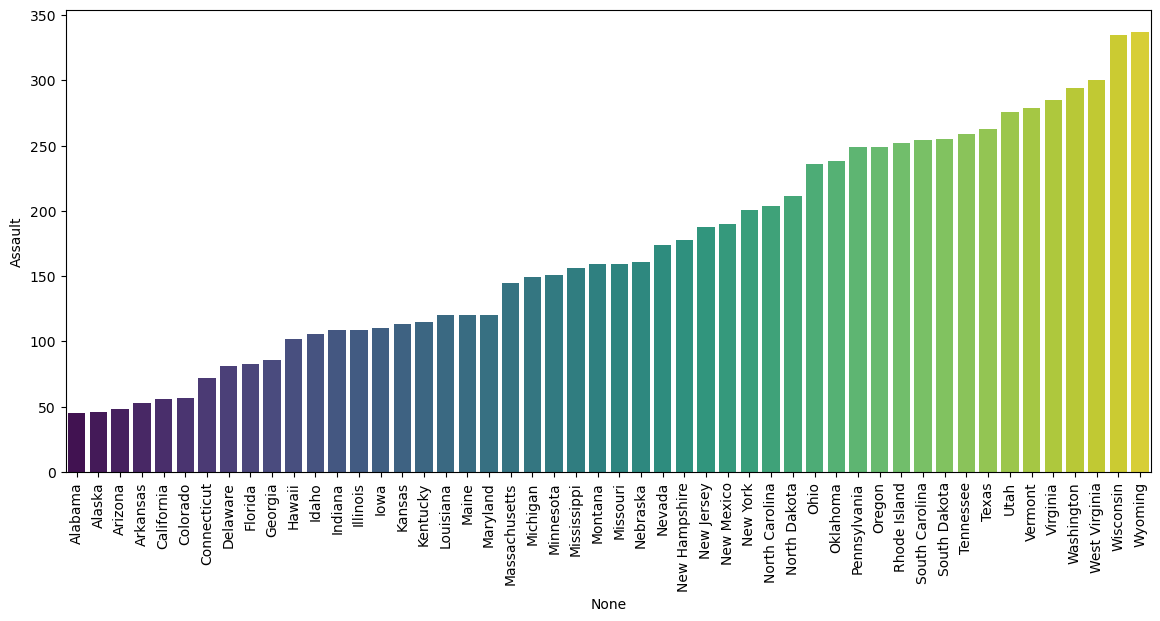

In [13]:
# Assault (saldırı suçları) değerlerine göre eyaletler

plt.figure(figsize = (14,6))
sns.barplot(y = df.Assault.sort_values(), x = df.Assault.sort_values().index, palette="viridis")
plt.xticks(rotation = 90);

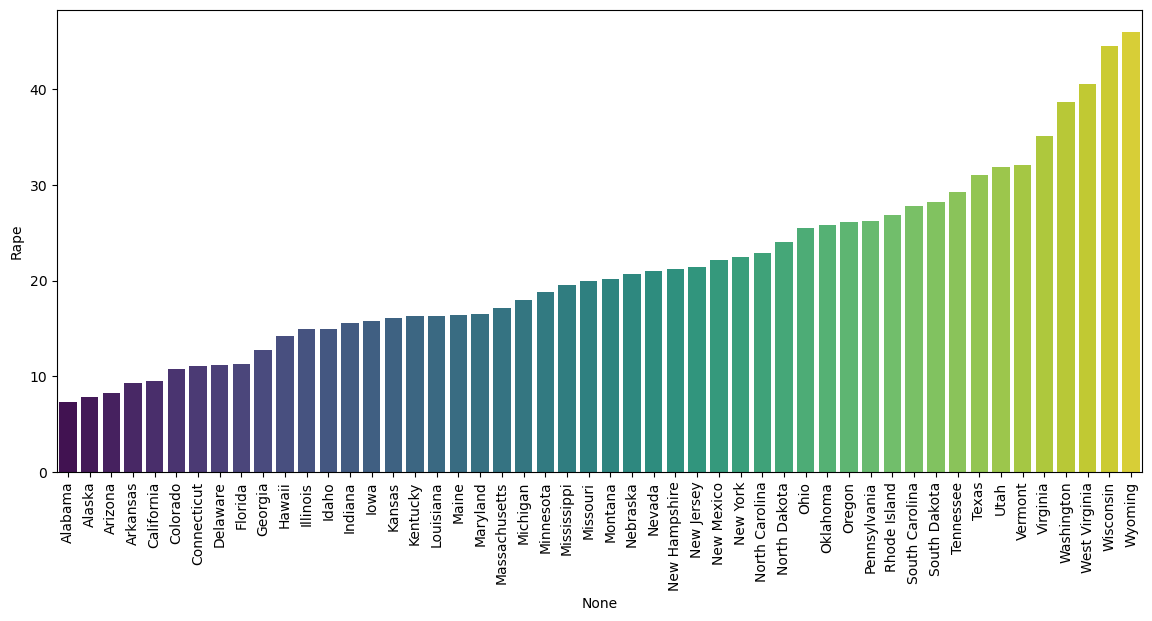

In [14]:
# Rape değerlerine göre eylatler
plt.figure(figsize = (14,6))
sns.barplot(y = df.Rape.sort_values(), x = df.Rape.sort_values().index, palette="viridis")
plt.xticks(rotation = 90);

## Hopkins Test

In [16]:
from sklearn.neighbors import BallTree
import numpy as np
import pandas as pd
def hopkins(data_frame, sampling_size):
    """Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express
    no clusterability and a score tending to 0 express a high cluster tendency.
    Parameters
    ----------
    data_frame : numpy array
        The input dataset
    sampling_size : int
        The sampling size which is used to evaluate the number of DataFrame.
    Returns
    ---------------------
    score : float
        The hopkins score of the dataset (between 0 and 1)
    Examples
    --------
    >>> from sklearn import datasets
    >>> from pyclustertend import hopkins
    >>> X = datasets.load_iris().data
    >>> hopkins(X,150)
    0.16
    """
    if type(data_frame) == np.ndarray:
        data_frame = pd.DataFrame(data_frame)
    # Sample n observations from D : P
    if sampling_size > data_frame.shape[0]:
        raise Exception(
            'The number of sample of sample is bigger than the shape of D')
    data_frame_sample = data_frame.sample(n=sampling_size)
    # Get the distance to their neirest neighbors in D : X
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(data_frame_sample, k=2)
    data_frame_sample_distances_to_nearest_neighbours = dist[:, 1]
    # Randomly simulate n points with the same variation as in D : Q.
    max_data_frame = data_frame.max()
    min_data_frame = data_frame.min()
    uniformly_selected_values_0 = np.random.uniform(min_data_frame[0], max_data_frame[0], sampling_size)
    uniformly_selected_values_1 = np.random.uniform(min_data_frame[1], max_data_frame[1], sampling_size)
    uniformly_selected_observations = np.column_stack((uniformly_selected_values_0, uniformly_selected_values_1))
    if len(max_data_frame) >= 2:
        for i in range(2, len(max_data_frame)):
            uniformly_selected_values_i = np.random.uniform(min_data_frame[i], max_data_frame[i], sampling_size)
            to_stack = (uniformly_selected_observations, uniformly_selected_values_i)
            uniformly_selected_observations = np.column_stack(to_stack)
    uniformly_selected_observations_df = pd.DataFrame(uniformly_selected_observations)
    # Get the distance to their neirest neighbors in D : Y
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(uniformly_selected_observations_df, k=1)
    uniformly_df_distances_to_nearest_neighbours = dist
    # return the hopkins score
    x = sum(data_frame_sample_distances_to_nearest_neighbours)
    y = sum(uniformly_df_distances_to_nearest_neighbours)
    if x + y == 0:
        raise Exception('The denominator of the hopkins statistics is null')
    return x / (x + y)[0]

In [17]:
hopkins(df, df.shape[0])

0.3386797098612995

## Scale

In [19]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [20]:
# farklı scaler leri denemek için 2 df oluşturalım

df1 = df.copy()
df2 = df.copy()

In [21]:
hopkins(MinMaxScaler().fit_transform(df1), df1.shape[0]) 

0.20469060383559778

In [22]:
hopkins(StandardScaler().fit_transform(df2), df2.shape[0])

0.20962245142123115

In [23]:
scaler = MinMaxScaler()

In [24]:
df_scaled = scaler.fit_transform(df)

In [25]:
#scale edilmiş datayı X e atayarak devam edeceğiz

X = pd.DataFrame(df_scaled, columns=df.columns)

## Dendrogram

In [27]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [28]:
hc_ward = linkage(y = X, method = "ward")
hc_complete = linkage(X, "complete")
hc_average = linkage(X, "average")
hc_single = linkage(X, "single")

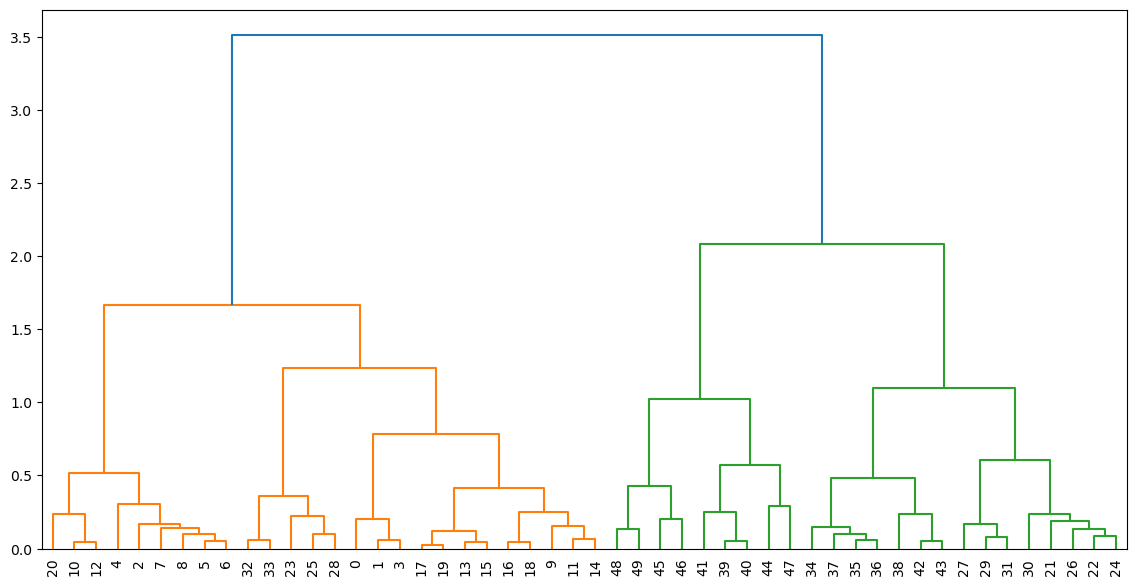

In [29]:
plt.figure(figsize = (14,7))
dendrogram(hc_ward, leaf_font_size = 10);

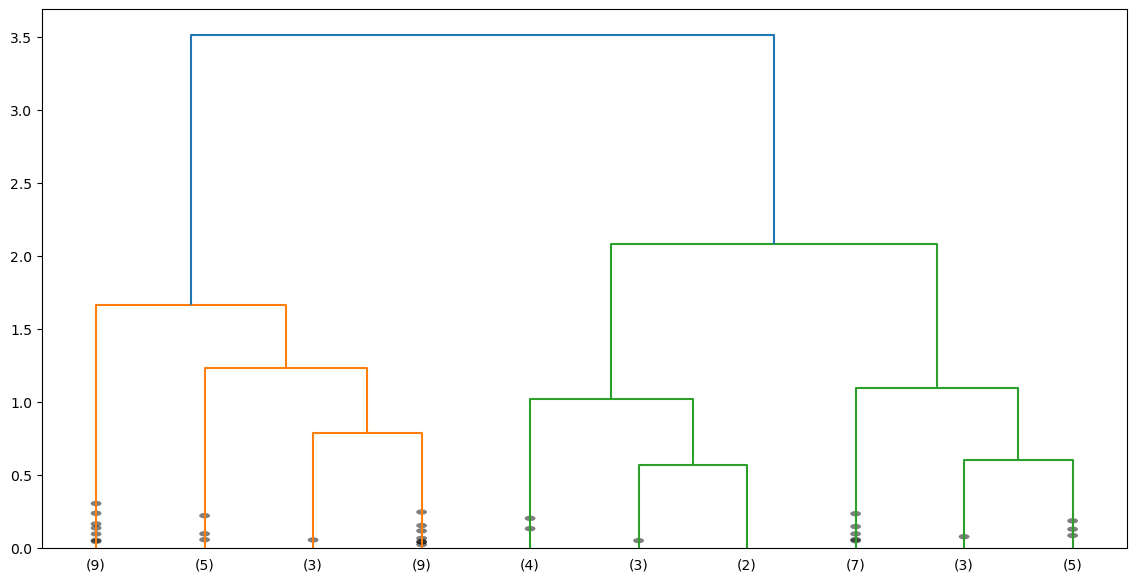

In [30]:
# daha sade dendrogram çizimi

plt.figure(figsize = (14,7))
dendrogram(hc_ward,
           truncate_mode = "lastp",
           p = 10,
           show_contracted = True,   
           leaf_font_size = 10);

# show_contracted = True: Dendrogramda kısaltılmış olan (gösterilmeyen) kümelerin birleşim yükseklikleri yatay çizgilerle gösterilir.

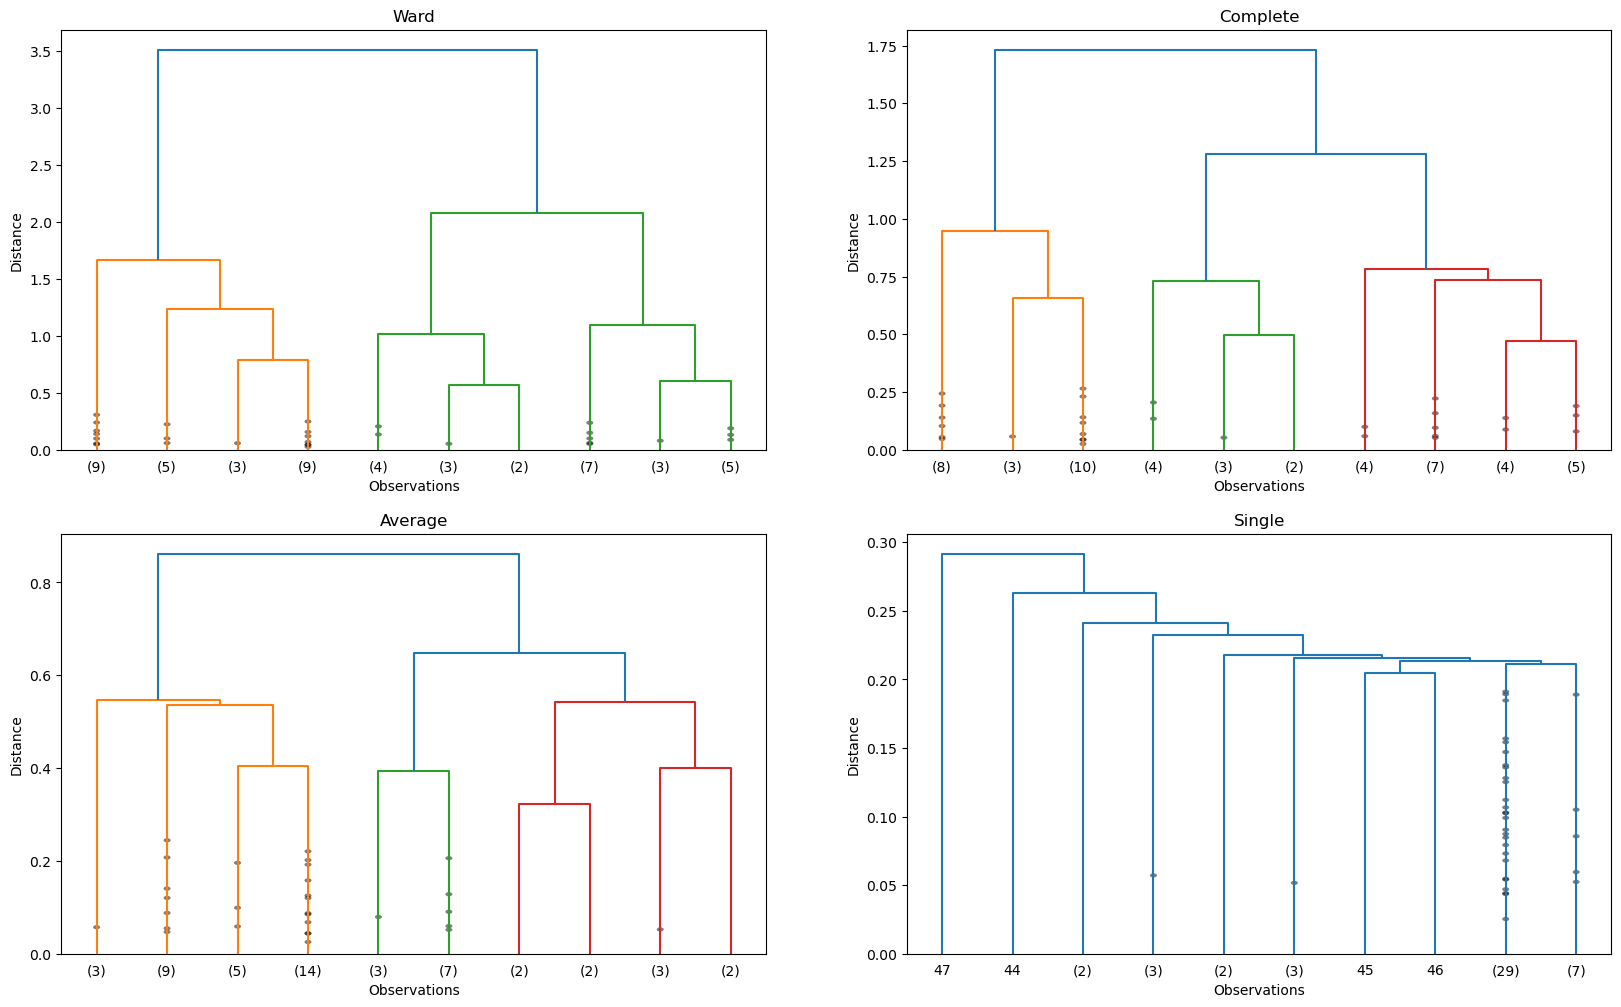

In [31]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

## Agglomerative Clustering

In [33]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [34]:
K = range(2,11)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(df, model.labels_)}')

Silhouette Score for 2 clusters: 0.45421907210414214
Silhouette Score for 3 clusters: 0.3180902156279954
Silhouette Score for 4 clusters: 0.13602999771899232
Silhouette Score for 5 clusters: 0.16195986543258523
Silhouette Score for 6 clusters: 0.22945281939930115
Silhouette Score for 7 clusters: 0.24214267818856985
Silhouette Score for 8 clusters: 0.3051367809988358
Silhouette Score for 9 clusters: 0.29774346557180853
Silhouette Score for 10 clusters: 0.2936409237035898


In [35]:
X.head()

,Murder,Assault,UrbanPop,Rape
0,0.000000,0.000000,0.440678,0.000000
1,0.078313,0.003425,0.271186,0.012920
2,0.078313,0.010274,0.813559,0.025840
3,0.084337,0.027397,0.305085,0.051680
4,0.084337,0.037671,1.000000,0.056848


In [36]:
model = AgglomerativeClustering(n_clusters=3, linkage = "ward")
clusters = model.fit_predict(X)
X["cluster"] = clusters

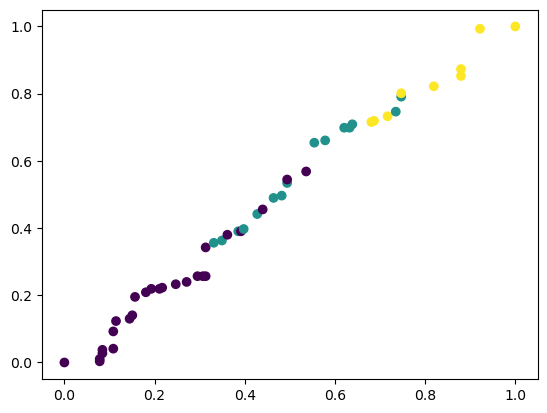

In [37]:
plt.scatter(X.Murder, X.Assault, c = clusters, cmap = "viridis");

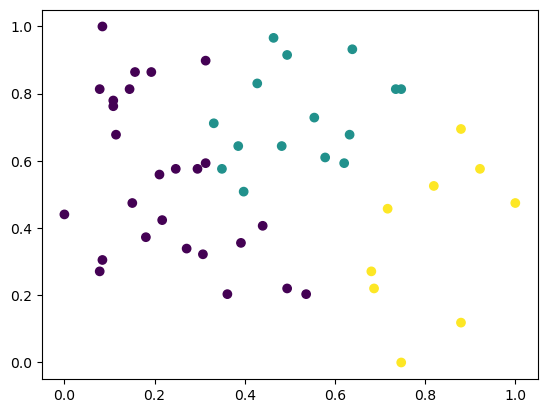

In [38]:
plt.scatter(X.Murder, X.UrbanPop, c = clusters, cmap = "viridis");

In [39]:
clus_pred = X.groupby("cluster").mean().T
clus_pred

cluster,0,1,2
Murder,0.226135,0.522490,0.814592
Assault,0.215227,0.561872,0.834475
UrbanPop,0.543025,0.731073,0.370998
Rape,0.190320,0.428079,0.736721


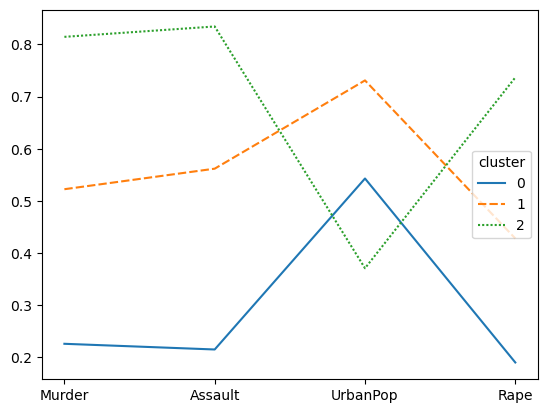

In [40]:
sns.lineplot(data = clus_pred);

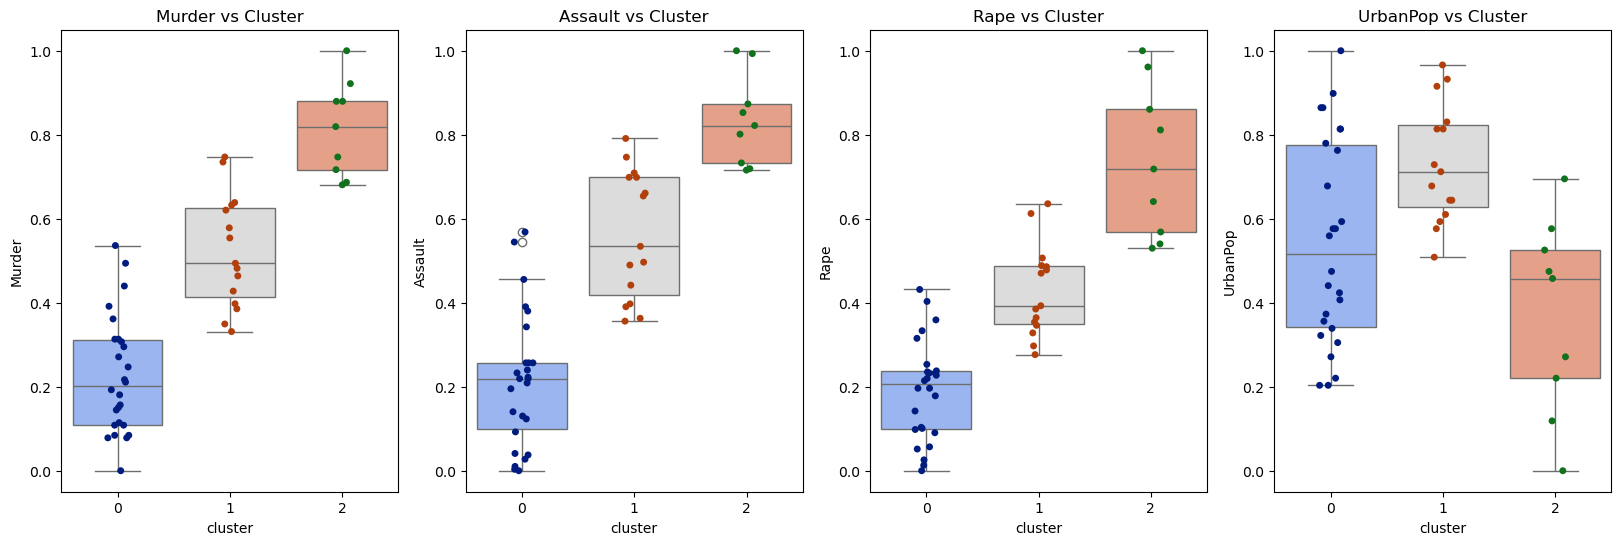

In [41]:
plt.figure(figsize=(20, 6))

plt.subplot(141)
sns.boxplot(y="Murder", x="cluster", data=X, palette="coolwarm")
sns.stripplot(y="Murder", x="cluster", data=X, palette="dark")
plt.title("Murder vs Cluster")

plt.subplot(142)
sns.boxplot(y="Assault", x="cluster", data=X, palette="coolwarm")
sns.stripplot(y="Assault", x="cluster", data=X, palette="dark")
plt.title("Assault vs Cluster")

plt.subplot(143)
sns.boxplot(y="Rape", x="cluster", data=X, palette="coolwarm")
sns.stripplot(y="Rape", x="cluster", data=X, palette="dark")
plt.title("Rape vs Cluster")

plt.subplot(144)
sns.boxplot(y="UrbanPop", x="cluster", data=X, palette="coolwarm")
sns.stripplot(y="UrbanPop", x="cluster", data=X, palette="dark")
plt.title("UrbanPop vs Cluster");

In [42]:
X.cluster.value_counts()

cluster
0    26
1    15
2     9
Name: count, dtype: int64

In [43]:
X2 = X.iloc[:, [0,1,3]]
X2.head()

,Murder,Assault,Rape
0,0.000000,0.000000,0.000000
1,0.078313,0.003425,0.012920
2,0.078313,0.010274,0.025840
3,0.084337,0.027397,0.051680
4,0.084337,0.037671,0.056848


In [44]:
hopkins(X2, X2.shape[0])

0.07272700823771372

In [45]:
hc_ward = linkage(y = X2, method = "ward")
hc_complete = linkage(X2, "complete")
hc_average = linkage(X2, "average")
hc_single = linkage(X2, "single")

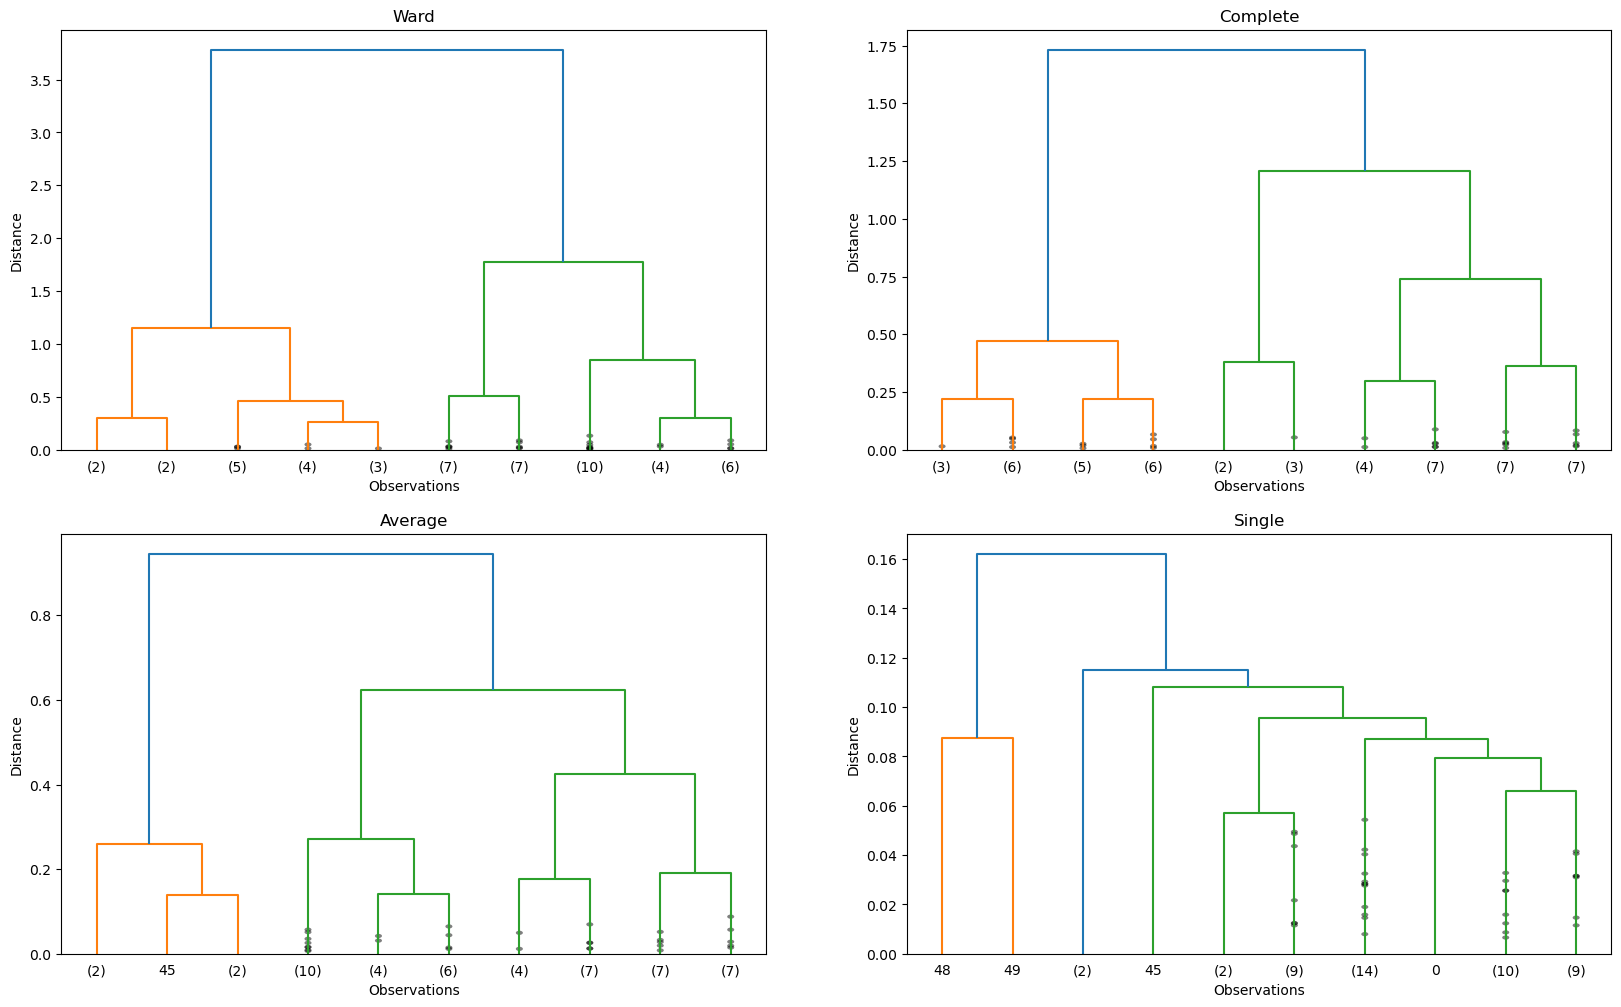

In [46]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

In [47]:
K = range(2,11)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X2)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(df, model.labels_)}')

Silhouette Score for 2 clusters: 0.5843563041221426
Silhouette Score for 3 clusters: 0.5408473507473215
Silhouette Score for 4 clusters: 0.49680242574181405
Silhouette Score for 5 clusters: 0.4610301160129345
Silhouette Score for 6 clusters: 0.45309851046082883
Silhouette Score for 7 clusters: 0.39604153006494913
Silhouette Score for 8 clusters: 0.39684807539987044
Silhouette Score for 9 clusters: 0.3700971634671143
Silhouette Score for 10 clusters: 0.36251487312336017


## Final Model

In [49]:
final_model = AgglomerativeClustering(n_clusters=3, metric = "euclidean", linkage = "ward")
clusters = final_model.fit_predict(X2)
X2["cluster"] = clusters

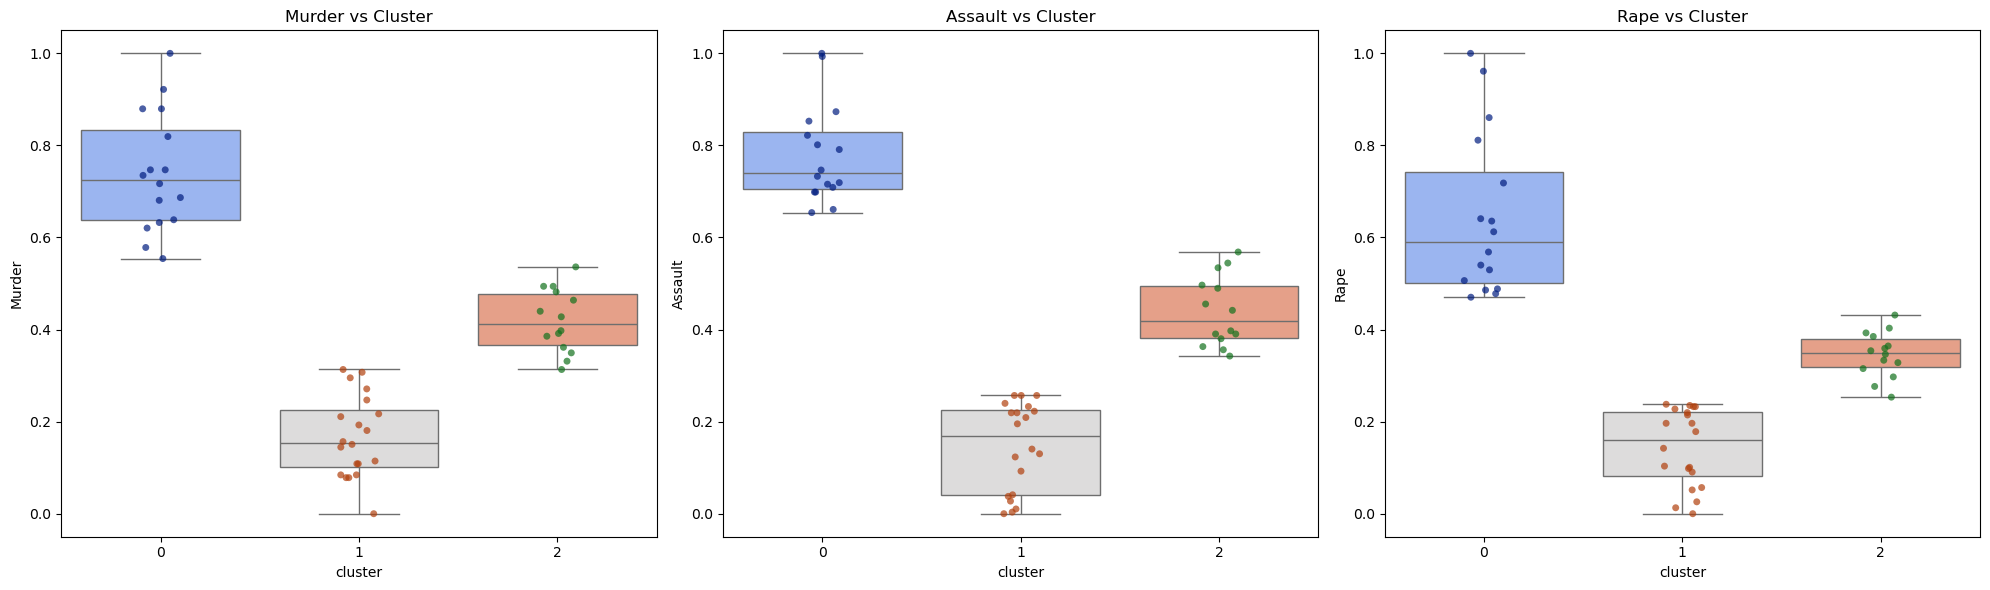

In [50]:
plt.figure(figsize=(20, 6))

plt.subplot(131)
sns.boxplot(y="Murder", x="cluster", data=X2, palette="coolwarm")
sns.stripplot(y="Murder", x="cluster", data=X2, palette="dark", size=5, jitter=True, alpha=0.7)
plt.title("Murder vs Cluster")

plt.subplot(132)
sns.boxplot(y="Assault", x="cluster", data=X2, palette="coolwarm")
sns.stripplot(y="Assault", x="cluster", data=X2, palette="dark", size=5, jitter=True, alpha=0.7)
plt.title("Assault vs Cluster")

plt.subplot(133)
sns.boxplot(y="Rape", x="cluster", data=X2, palette="coolwarm")
sns.stripplot(y="Rape", x="cluster", data=X2, palette="dark", size=5, jitter=True, alpha=0.7)
plt.title("Rape vs Cluster")

plt.tight_layout()
plt.show()

In [51]:
X2["crime_level"] = X2["cluster"].map({0:"Danger Zone", 1:"Safe Zone",2:"Moderate Zone"})   
X2.head()

,Murder,Assault,Rape,cluster,crime_level
0,0.000000,0.000000,0.000000,1,Safe Zone
1,0.078313,0.003425,0.012920,1,Safe Zone
2,0.078313,0.010274,0.025840,1,Safe Zone
3,0.084337,0.027397,0.051680,1,Safe Zone
4,0.084337,0.037671,0.056848,1,Safe Zone


In [52]:
df.index

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

In [53]:
X2["States"] = df.index   
X2

,Murder,Assault,Rape,cluster,crime_level,States
0,0.000000,0.000000,0.000000,1,Safe Zone,Alabama
1,0.078313,0.003425,0.012920,1,Safe Zone,Alaska
2,0.078313,0.010274,0.025840,1,Safe Zone,Arizona
3,0.084337,0.027397,0.051680,1,Safe Zone,Arkansas
4,0.084337,0.037671,0.056848,1,Safe Zone,California
5,0.108434,0.041096,0.090439,1,Safe Zone,Colorado
6,0.108434,0.092466,0.098191,1,Safe Zone,Connecticut
7,0.114458,0.123288,0.100775,1,Safe Zone,Delaware
8,0.144578,0.130137,0.103359,1,Safe Zone,Florida
9,0.150602,0.140411,0.142119,1,Safe Zone,Georgia


In [54]:
X2[X2.crime_level=="Safe Zone"]["States"]  # suç oranının düşük oldugu eyaletler

0         Alabama
1          Alaska
2         Arizona
3        Arkansas
4      California
5        Colorado
6     Connecticut
7        Delaware
8         Florida
9         Georgia
10         Hawaii
11          Idaho
12       Illinois
13        Indiana
14           Iowa
15         Kansas
16       Kentucky
17      Louisiana
18          Maine
19       Maryland
Name: States, dtype: object

In [55]:
X2[X2.crime_level=="Danger Zone"]["States"]  # suç oranının yüksek oldugu eyaletler

34              Ohio
35          Oklahoma
36            Oregon
37      Pennsylvania
38      Rhode Island
39    South Carolina
40      South Dakota
41         Tennessee
42             Texas
43              Utah
44           Vermont
45          Virginia
46        Washington
47     West Virginia
48         Wisconsin
49           Wyoming
Name: States, dtype: object

In [56]:
X2[X2.crime_level=="Moderate Zone"]["States"]  # suç oranının orta düzeyde oldugu eyaletler

20     Massachusetts
21          Michigan
22         Minnesota
23       Mississippi
24          Missouri
25           Montana
26          Nebraska
27            Nevada
28     New Hampshire
29        New Jersey
30        New Mexico
31          New York
32    North Carolina
33      North Dakota
Name: States, dtype: object

# <p style="background-color:green;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>Faydalı Olması Temennisiyle Teşekkürler</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Whatsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |